## **24 Jan, 2025**
## Regression Analysis Lab

## Experiment 3



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
y = np.array([16.68, 11.50, 12.03, 14.88, 13.75, 18.11, 8.00, 17.83, 79.24, 21.50, 40.33, 21.00, 13.50, 19.75, 24.00, 29.00, 15.35, 19.00, 9.50, 35.10, 17.90, 52.32, 18.75, 19.83, 10.75])
x1 = np.array([7, 3, 3, 4, 6, 7, 2, 7, 30, 5, 16, 10, 4, 6, 9, 10, 6, 7, 3, 17, 10, 26, 9, 8, 4])
x2 = np.array([560, 220, 340, 80, 150, 330, 110, 210, 1460, 605, 688, 215, 255, 462, 448, 776, 200, 132, 36, 770, 140, 810, 450, 635, 150])

In [3]:
data = pd.DataFrame({'Delivery Time (y)':y, 'Number of Cases (x1)':x1, 'Distance (x2)': x2})
data.head()

,Delivery Time (y),Number of Cases (x1),Distance (x2)
0,16.68,7,560
1,11.50,3,220
2,12.03,3,340
3,14.88,4,80
4,13.75,6,150


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


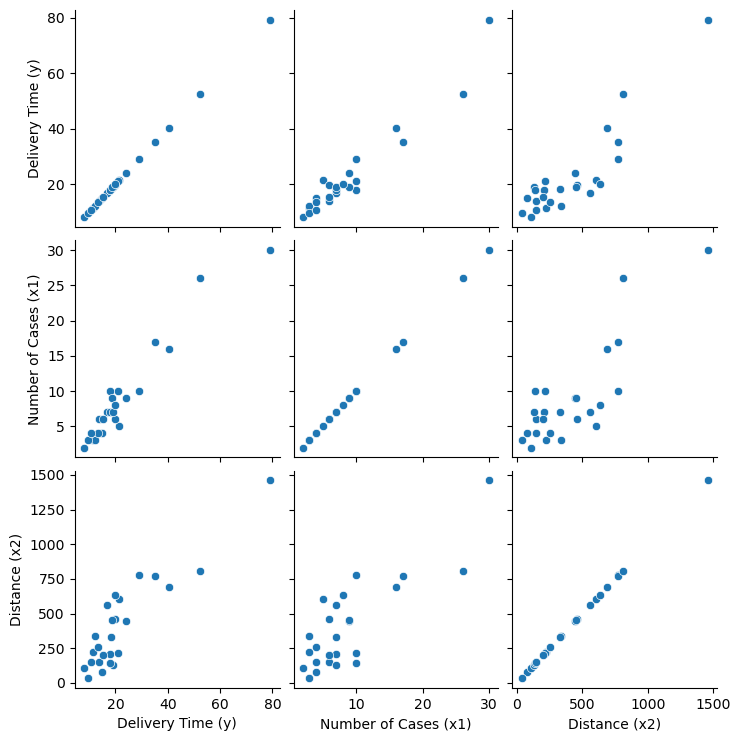

In [4]:
sns.pairplot(data, diag_kind=None)

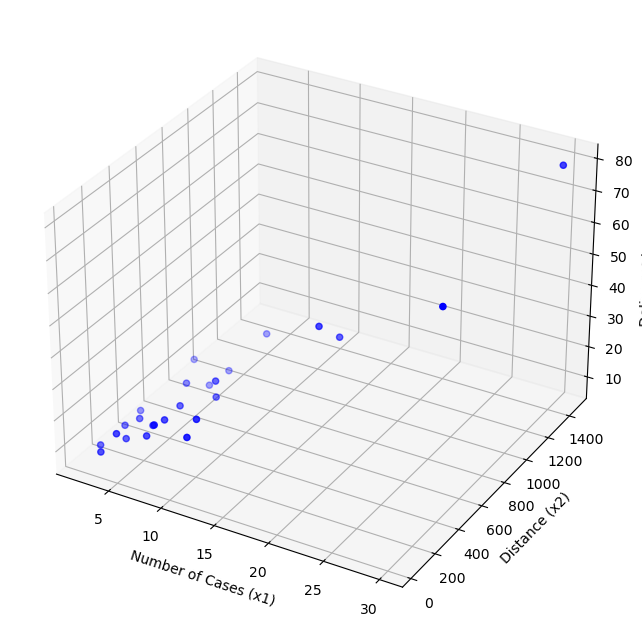

In [5]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, c='blue', marker='o')

ax.set_xlabel('Number of Cases (x1)')
ax.set_ylabel('Distance (x2)')
ax.set_zlabel('Delivery Time (y)')

plt.show()

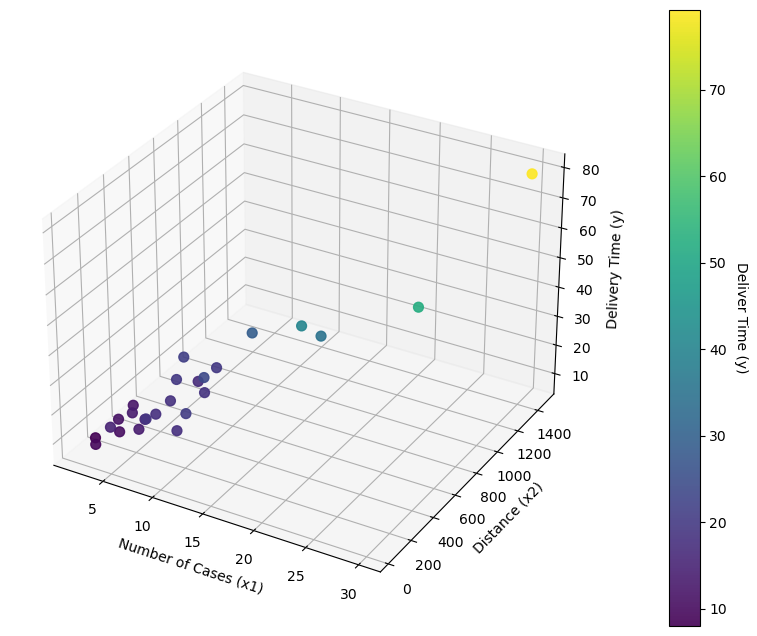

In [6]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x1, x2, y, c=y, cmap='viridis',s=50, alpha=0.9)

ax.set_xlabel('Number of Cases (x1)')
ax.set_ylabel('Distance (x2)')
ax.set_zlabel('Delivery Time (y)')

cbar = plt.colorbar(sc, ax=ax, pad=0.1)

cbar.set_label('Deliver Time (y)', rotation=270, labelpad=15)

plt.show()

In [7]:
n = len(y)

x = np.column_stack((np.ones(n), x1, x2))

XtX = np.dot(x.T, x)

XtX_inv = np.linalg.inv(XtX)

Xty = np.dot(x.T, y)

beta_hat = np.dot(XtX_inv, Xty)

print('OLS Estimate (B0, B1, B2): {}'.format(beta_hat))

OLS Estimate (B0, B1, B2): [2.34123115 1.61590721 0.01438483]


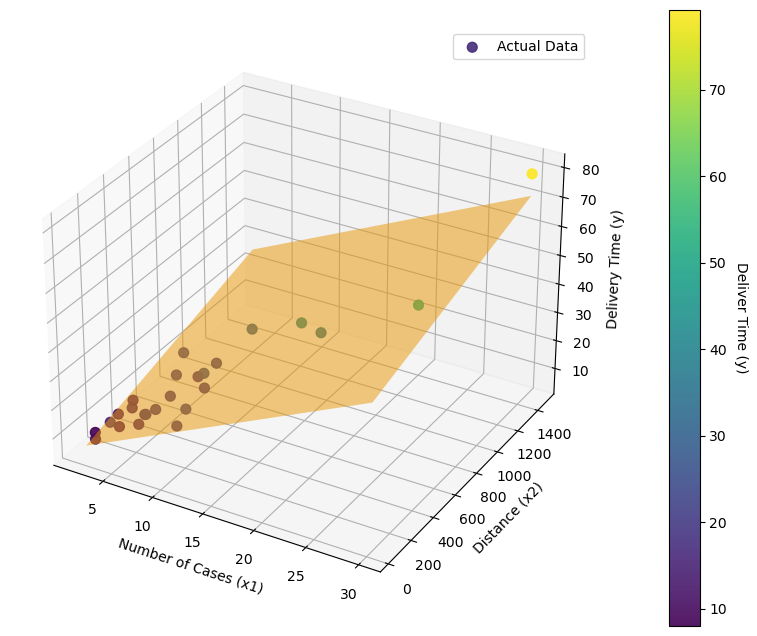

In [8]:
x1_grid, x2_grid = np.meshgrid(np.linspace(min(x1), max(x1), 20), np.linspace(min(x2), max(x2), 20))
y_pred = beta_hat[0] + beta_hat[1]*x1_grid + beta_hat[2]*x2_grid

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x1, x2, y, c=y, cmap='viridis', s=50, alpha=0.9, label='Actual Data')
ax.plot_surface(x1_grid, x2_grid, y_pred, color='orange', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('Number of Cases (x1)')
ax.set_ylabel('Distance (x2)')
ax.set_zlabel('Delivery Time (y)')

cbar = plt.colorbar(sc, ax=ax, pad=0.1)

cbar.set_label('Deliver Time (y)', rotation=270, labelpad=15)

plt.legend()
plt.show()